Here in this series of makemore we are going to implement the language model using various neural nets
1) Bigram Model
2) Bag of words
3) MLP along the lines of bengio et al 2003
4) RNN
5) GRU
6) and the final Transformer as in line with the GPT2
We have already implemented the GPT3 transformer architecture and the neural net too which we can see in the last two python notebook

In [34]:
words = open(r'C:\Users\bhara\PycharmProjects\hugging\Dataset\Makemore\Names\names.txt','r').read().splitlines()

In [35]:
words[:10] #we read the data into a list of words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [36]:
len(words)

32033

In [37]:
min(len(w) for w in words)

2

In [38]:
max(len(w) for w in words)

15

1st langugae model
predicting the next charecter given a sequence of charecters 
example: emma ; 1st e is likely to come 1st then m is likely to come after e
after em m is likely to come so we split the data and build the first Bigram Model
1) bigram model

In [39]:
# #we maintain a dict to count the number of chars followed by other
# b = {}
# for w in words:
#     chs = ['<S>'] + list(w) + ['<E>']
#     for ch1,ch2 in zip(chs,chs[1:]):#iterate over all the letters of the words
#         bigram = (ch1,ch2)
#         b[bigram] = b.get(bigram,0) + 1
#         # print(ch1,ch2)

In [41]:
# list(w)

In [42]:
b #for counters of all bigrams
#sort by the count of the occuring bigrams
sorted(b.items(), key=lambda kv: -kv[1]) #n <E> is followed in our dataset for 6763 times

[(('a', 'n'), 10876),
 (('n', '<E>'), 6763),
 (('n', '.'), 6763),
 (('a', '<E>'), 6640),
 (('a', '.'), 6640),
 (('a', 'r'), 6528),
 (('e', 'l'), 6496),
 (('r', 'i'), 6066),
 (('n', 'a'), 5954),
 (('l', 'e'), 5842),
 (('e', 'n'), 5350),
 (('l', 'a'), 5246),
 (('m', 'a'), 5180),
 (('a', 'l'), 5056),
 (('l', 'i'), 4960),
 (('i', 'a'), 4890),
 (('o', 'n'), 4822),
 (('r', 'a'), 4712),
 (('a', 'h'), 4664),
 (('h', 'a'), 4488),
 (('<S>', 'a'), 4410),
 (('.', 'a'), 4410),
 (('y', 'a'), 4286),
 (('i', 'n'), 4252),
 (('a', 'y'), 4100),
 (('e', '<E>'), 3983),
 (('e', '.'), 3983),
 (('e', 'r'), 3916),
 (('n', 'n'), 3812),
 (('y', 'n'), 3652),
 (('k', 'a'), 3462),
 (('n', 'i'), 3450),
 (('r', 'e'), 3394),
 (('i', 'e'), 3306),
 (('a', 'i'), 3300),
 (('a', 'm'), 3268),
 (('l', 'y'), 3176),
 (('<S>', 'k'), 2963),
 (('.', 'k'), 2963),
 (('j', 'a'), 2946),
 (('n', 'e'), 2718),
 (('l', 'l'), 2690),
 (('i', 'l'), 2690),
 (('i', 's'), 2632),
 (('d', 'a'), 2606),
 (('s', 'h'), 2570),
 (('d', 'e'), 2566),
 (

In [43]:
#we store the above data in a matrix where the rows are a char and cols too char
import torch

In [44]:
a = torch.zeros((3,4),dtype=torch.int32)
a

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

In [45]:
a.dtype # this is the default datatype we changes it into int32

torch.int32

In [46]:
a[1,3] += 1

In [47]:
a[0,0] = 4
a

tensor([[4, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]], dtype=torch.int32)

In [48]:
N = torch.zeros((27,27),dtype = torch.int32) # because we have 26 alphabets + <S> + <E> token so we create a matrix of 28*28

In [49]:
chars = sorted(list(set(''.join(words)))) #we got all the unique chars from the dataset

In [52]:
#now we map char to integer string to int
stoi ={s:i+1 for i,s in enumerate(chars)} #we got the mapping for all the unique chars in dataset
stoi['.'] = 0
stoi
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [53]:

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):#iterate over all the letters of the words
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [18]:
# N

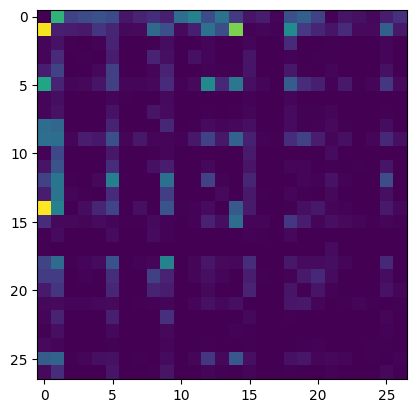

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N) #we got a plot but we need other mapping too

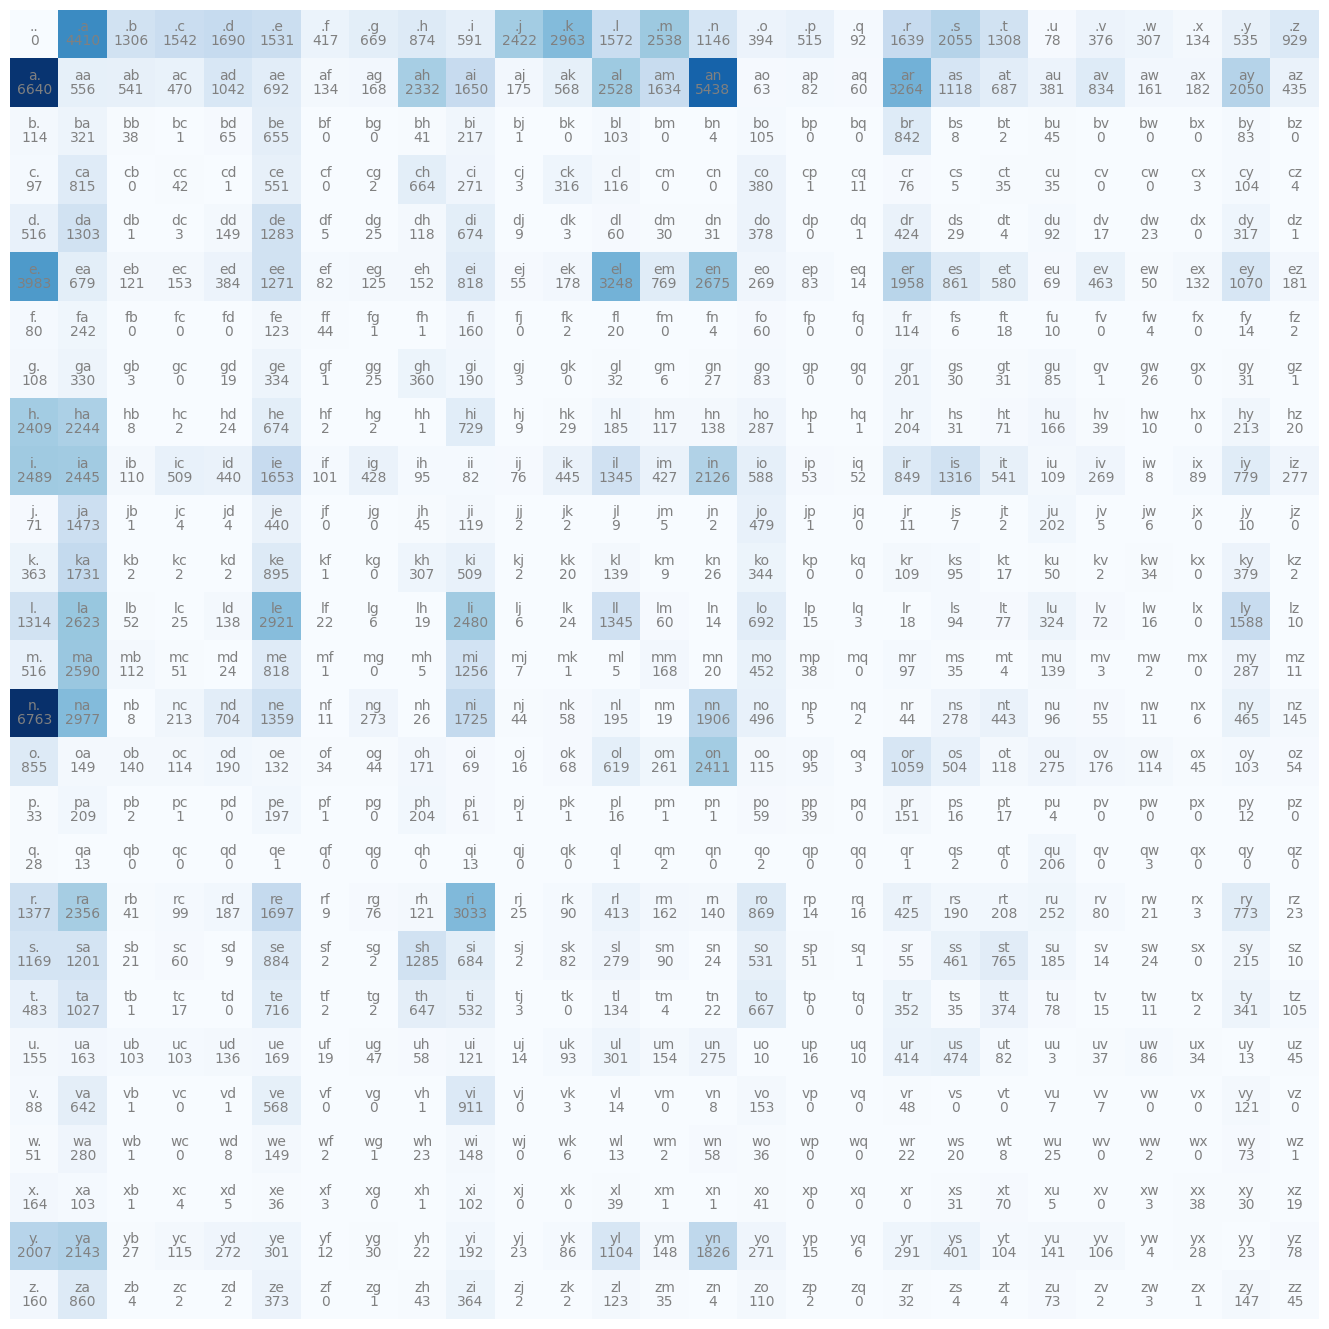

In [55]:
plt.figure(figsize=(17,17))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='gray')
plt.axis('off');

In [56]:
N[0,:] #to get the  0th row i.e., the 1st row u can cross check too N[0] also give the same

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [57]:
p1 = N[0].float() # to normalize the counts and we need to divide so we convert to float
p1 = p1/p1.sum()
p1

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [58]:
sum(p1) # the whole sum is done to 1 i.e., and probabilities

tensor(1.)

In [59]:
#torch.multinomial i/p - probabilities o/p-gives integers sampled from the prob disribution
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [60]:
#from above p it is obvious that 60% of samples are 0 and 30% are 1 and 9% are 2 so outof 20 samples generated we can see the distribution
#from prob to the 
torch.multinomial(p,num_samples=100,replacement=True,generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [61]:
#now we are going to sample from N[0]
p2 = N[0].float() # to normalize the counts and we need to divide so we convert to float
p2 = p2/p2.sum()
p2

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [63]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p1,num_samples=1,replacement=True,generator=g).item()
itos[ix]

'j'

In [85]:
p = N.float()
p.sum(0,keepdim=True).shape # we get the vertical sum i.e., 1*27
#but we need 27*1 so the following
p.sum(1,keepdim=True).shape
# can we do 27*27 array and divide by 27*1 array here we need broadcasting
#we need to align the shapes and size
# 27*27 / 27*1
#what if keepdim = false
p.sum(1,keepdim=False)
#can we broadcast it?
# yes but we will not get the desired the row wise addition result 
# what it does is it creates 1*27 and it broadcasts 27*27 / 1*27 which will give garbage values 
# so we need to keepdim=true
p = p/p.sum(1,keepdim=False)
p[0].sum() #here we are not normalizing the rows we are doing it cols

tensor(7.0225)

In [113]:
#now we are going to prepare a matrix N which have the probability distribution given the char we are in
# this is the same mess we are doing as N this is for efficiency
# we are going to broadcasting so that we need to be very good at tensors till the transformers
p = (N+1).float()
p.sum() #sum of entire matrix but we need all the rows to be divide by their respective row sum
p /= p.sum(1,keepdim=True)
p

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [114]:
for i in range(5):
    ix = 0
    out = []
    while True:
        p3 = p[ix]
        # p3 = N[ix].float()
        # p3 = p3/p3.sum() 
        #making uniform distribution and everything is evenly likey
        # p3 = torch.ones(27)/27
        ix = torch.multinomial(p3,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

ri.
na.
yairey.
anian.
tadha.


In [96]:
# how good it is predicting like the loss of the model
for w in words[:2]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):#iterate over all the letters of the words
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = p[ix1,ix2]
        print(f'{ch1}{ch2}: {prob:.4f}')

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a.: 0.1960
.o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a.: 0.1960


In [117]:
# max likelihood estimation
# likelihood product of all prob in the training
# but the product of all the prob is a very tiny number so we work with log of the likelihood
# how good it is predicting like the loss of the model
loglikehood = 0
n = 0
for w in ['jatoth']:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):#iterate over all the letters of the words
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = p[ix1,ix2]
        logprob = torch.log(prob)
        loglikehood+= logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f}, {logprob:.4f}')
print(f'{loglikehood=}') 
negativeloglikehood = -loglikehood
print(f'{negativeloglikehood=}')
#this this the quality that models gives us
# the lower it is better we are higher we are not good
# min -velikehood max likehood
# we need the parameters(here the prob stored in the ) to reduce the negativeloglikehood
# we add 1 to the matrix so that it will smooth the model and no inf values appear
print(f'negativeloglikehood normalized:{negativeloglikehood/n}') 

.j: 0.0756, -2.5826
ja: 0.5036, -0.6860
at: 0.0203, -3.8977
to: 0.1193, -2.1257
ot: 0.0149, -4.2032
th: 0.1158, -2.1561
h.: 0.3153, -1.1542
loglikehood=tensor(-16.8055)
negativeloglikehood=tensor(16.8055)
negativeloglikehood normalized:2.400782823562622


In [139]:
# create the training set of all the bigrams(x,y)
# xs inputs ys labels i.e., the next outcome
xs,ys = [],[]
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):#iterate over all the letters of the words
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # print(ch1,ch2,ix1,ix2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [143]:
xs #the inputs are read as 0 i/p(xs) and 5 is o/p (ys) this is done for the all input words

tensor([ 0,  5, 13, 13,  1])

In [144]:
ys

tensor([ 5, 13, 13,  1,  0])

In [146]:
#how to feedin the above data into the neural net we use one hot encodings
# where for 1st example we get 5 individual one hot encoding
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes=27).float()
xenc.dtype # we need to feedin float to neural net

torch.float32

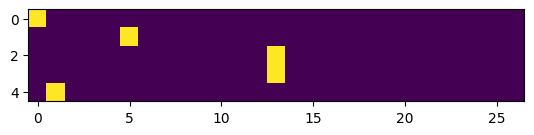

In [147]:
plt.imshow(xenc)

In [178]:
# neuron look at the onehot encoded data
W = torch.randn((27,27))
# here we need 27 neurons 
mult = xenc @ W #5*27 * 27*27 -> 5*27 shape
mult

tensor([[ 0.1357, -0.4951, -1.3135, -1.4427,  0.9063,  0.7932, -0.7319, -0.5607,
         -0.1545,  1.0628,  1.4262, -0.6574, -0.6739,  0.8090, -0.0334,  1.7161,
         -0.6484,  1.8295, -0.6738, -0.0341,  0.3180, -0.1668, -1.0372,  0.9954,
         -0.0926,  1.0629, -2.4115],
        [-0.6929,  1.0969, -0.4935, -1.0827, -0.8140, -1.8916,  0.3956, -0.8532,
          0.1465, -1.2932, -0.8158, -1.1690,  0.0489, -1.1235, -0.4326,  2.5269,
          0.3435,  0.1224,  1.4480, -0.5014, -1.0140, -0.5023,  0.0655,  1.8568,
         -1.4925, -0.5996, -0.3473],
        [ 0.8822,  1.2558, -0.7156,  0.5357, -1.4057, -0.0461, -2.1380, -0.3195,
         -2.0485, -0.6936,  0.1489, -0.0761,  0.7889,  0.3650, -0.6055,  0.7493,
          0.1969, -0.5168,  2.0871,  1.2854, -0.1638, -1.7174, -1.0657,  0.3053,
         -0.6284,  0.5821, -0.2631],
        [ 0.8822,  1.2558, -0.7156,  0.5357, -1.4057, -0.0461, -2.1380, -0.3195,
         -2.0485, -0.6936,  0.1489, -0.0761,  0.7889,  0.3650, -0.6055,  0.7493

In [163]:
(xenc[3] * W[:,13]).sum() #to show how the multiplication is done

tensor(-1.5098)

In [175]:
logits = mult
counts = logits.exp() #counts is equivalent to N
prob = counts/ counts.sum(1,keepdims =True) #the last two lines is softmax activation fun
print(counts,prob)
print(prob[0].sum(),prob.shape) #here we got a prob with sum of 1
print(prob[0])

tensor([[ 1.1105,  1.6787,  3.7662,  0.5296,  5.9910,  0.5021,  0.7025,  0.7404,
          2.2763,  4.0450,  0.5688,  0.8907,  0.2409,  0.3655,  1.1715,  3.3102,
          2.6964,  0.3895,  1.0953,  0.5107,  1.5384,  0.9195,  0.2333,  1.6037,
          2.3289,  1.5586,  0.2837],
        [ 0.3512,  0.4891,  0.8062,  4.6065,  0.7325,  0.6727,  0.7902,  1.0789,
          4.3541,  1.5746,  0.4790,  5.2052,  0.6555,  1.1606,  1.9028,  0.1103,
          2.2093,  0.5150,  2.4850,  1.6991,  0.5136,  0.3864,  1.4681,  0.1274,
          0.7167,  1.4825,  0.4537],
        [ 1.0719,  1.9326,  0.4655, 10.5989,  2.0497,  0.4408,  2.0038,  0.6029,
          2.4400,  0.0403,  0.7720,  1.8244,  1.6073,  1.4667,  0.1772,  0.8549,
          0.5656,  1.0211,  0.9686,  3.8906,  0.5858,  1.4247,  1.5441,  1.2080,
          0.6916,  1.3133,  1.0009],
        [ 1.0719,  1.9326,  0.4655, 10.5989,  2.0497,  0.4408,  2.0038,  0.6029,
          2.4400,  0.0403,  0.7720,  1.8244,  1.6073,  1.4667,  0.1772,  0.8549

In [179]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', prob[i])
    print('label (actual next character):', y)
    p = prob[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0271, 0.0409, 0.0918, 0.0129, 0.1460, 0.0122, 0.0171, 0.0180, 0.0555,
        0.0985, 0.0139, 0.0217, 0.0059, 0.0089, 0.0285, 0.0806, 0.0657, 0.0095,
        0.0267, 0.0124, 0.0375, 0.0224, 0.0057, 0.0391, 0.0567, 0.0380, 0.0069])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012231833301484585
log likelihood: -4.403713226318359
negative log likelihood: 4.403713226318359
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0095, 0.0132, 0.0218, 0.1244, 0.0198, 0.0182, 0.0213, 0.0291, 0.1176,
        0.0425, 0.0129, 0.1406, 0.0177, 0.0313, 0.0514, 0.0030, 0.0597, 0.0139,
        0.0671, 0.0459, 0.0139, 0.0104, 0.0397, 0.0034, 0.0194, 0.0400, 0.0123])
label (actual next character): 13
probability assigned by the net to the the correct character: 0

In [180]:
xs,ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [209]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator=g,requires_grad=True) # randomly initialize 27 neurons' weights. each neuron receives 27 inputs

In [218]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
prob = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -prob[torch.arange(5),ys].log().mean() #loss as we need
print(loss.item())

3.7492127418518066


In [199]:
prob.shape

torch.Size([5, 27])

In [200]:
prob[0,5],prob[1,13],prob[2,13],prob[3,1],prob[4,0] #the output probs we need

(tensor(0.0123),
 tensor(0.0181),
 tensor(0.0267),
 tensor(0.0737),
 tensor(0.0150))

In [201]:
loss = -prob[torch.arange(5),ys].log().mean() #same as above or the ys we need
loss

tensor(3.7693)

In [211]:
#now backwardpass
W.grad = None
loss.backward()

In [213]:
W.shape

torch.Size([27, 27])

In [214]:
W.grad.shape

torch.Size([27, 27])

In [217]:
W.data += -0.1 * W.grad

In [219]:
#now updated forward pass is
W.grad = None
loss.backward()
loss

tensor(3.7492, grad_fn=<NegBackward0>)

In [230]:
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [235]:
(W**2).mean()

tensor(1.8777, grad_fn=<MeanBackward0>)

In [236]:
# gradient descent
for k in range(100):
    #When W all are 0 e^0 is 1 and the smooth distribution is going to acheive which is not reqired
    # so we go for the regularization
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    #adding the reg parameter is == adding smoothing in weight matrix i.e., in N
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    
    # update
    W.data += -50 * W.grad
# print(W.data)

2.481499195098877
2.4814913272857666
2.4814834594726562
2.481475591659546
2.4814682006835938
2.4814603328704834
2.481452465057373
2.4814453125
2.481437921524048
2.4814302921295166
2.4814229011535645
2.4814157485961914
2.4814083576202393
2.4814014434814453
2.4813942909240723
2.4813876152038574
2.4813807010650635
2.4813737869262695
2.481367349624634
2.4813601970672607
2.481353759765625
2.4813473224639893
2.4813406467437744
2.4813339710235596
2.481327533721924
2.481321334838867
2.4813153743743896
2.481309175491333
2.4813029766082764
2.4812963008880615
2.481290817260742
2.4812846183776855
2.481278896331787
2.4812729358673096
2.481266975402832
2.4812612533569336
2.4812557697296143
2.4812498092651367
2.4812443256378174
2.481238603591919
2.4812331199645996
2.4812276363372803
2.48122239112854
2.4812166690826416
2.4812114238739014
2.481206178665161
2.481200695037842
2.4811959266662598
2.4811906814575195
2.4811854362487793
2.481180191040039
2.481175661087036
2.481170654296875
2.481165647506714
2

In [240]:
#finally sample from the neural net model
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        # ----------
        # BEFORE:
        #p = P[ix] it comrs from the row
        # ----------
        # NOW:
        # now we have optimized the W and we get the 
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character
        # ----------
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
          break
    print(''.join(out))

junide.
janasah.
p.
cfay.
a.
